# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Julio Moreno Blanco
*   Alumno 2: Mireia Carbó Feliu
*   Alumno 3: Bryan Duque Gutiérrez






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [35]:
# # ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
# mount='/content/gdrive'
# drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

# try:
#   from google.colab import drive
#   IN_COLAB=True
# except:
#   IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [36]:
# # Switch to the directory on the Google Drive that you want to use
# import os
# if IN_COLAB:
#   print("We're running Colab")

#   if IN_COLAB:
#     # Mount the Google Drive at mount
#     print("Colab: mounting Google drive on ", mount)

#     drive.mount(mount)

#     # Create drive_root if it doesn't exist
#     create_drive_root = True
#     if create_drive_root:
#       print("\nColab: making sure ", drive_root, " exists.")
#       os.makedirs(drive_root, exist_ok=True)

#     # Change to the directory
#     print("\nColab: Changing directory to ", drive_root)
#     %cd $drive_root
# # Verify we're in the correct working directory
# %pwd
# print("Archivos en el directorio: ")
# print(os.listdir())

---
### 1.4. Instalar librerías necesarias

In [37]:
# if IN_COLAB:
#   %pip install gym==0.17.3
#   %pip install git+https://github.com/Kojoley/atari-py.git
#   %pip install keras-rl2==1.0.5
#   %pip install tensorflow==2.8
# else:
#   %pip install gym==0.17.3
#   %pip install git+https://github.com/Kojoley/atari-py.git
#   %pip install pyglet==1.5.0
#   %pip install h5py==3.1.0
#   %pip install Pillow==9.5.0
#   %pip install keras-rl2==1.0.5
#   %pip install Keras==2.2.4
#   %pip install tensorflow==2.5.3
#   %pip install torch==2.0.1
#   %pip install agents==1.4.0

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

### **Introducción**

El entorno sobre el que vamos a trabajar es SpaceInvaders-v0, que pertenece a la colección de Atari Games disponible en Gymnasium. Es una versión del videojuego Space Invaders, donde controlasuna nave que se mueve lateralmente por la parte inferior de la pantalla y dispara a los enemigos que van bajando de la parte superior de la pantalla.

El **objetivo principal** es sobrevivir y destruir enemigos, y se obtienen recomensas cuando se destruye al enemigo.

Antes de implementar los modelos, debemos tener en cuenta diferentes cosas:


*   Las observaciones son de tipo imagen RGB de 210x160 píxeles con 3 canales. Por lo tanto, nuestro **input** es de tipo imagen.
*   Se pueden realizar diferentes tipos de **acciones**:
    * 0: NOOP (no hacer nada)
    * 1: FIRE (dispara)
    * 2: RIGHT
    * 3: LEFT
    * 4: RIGHTFIRE
    * 5: LEFTFIRE
* **Recompensas**: Cada enemigo destruido da una recompensa positiva. Si pierdes una vida, no necesariamente recibes recompensa negativa, pero el episodio puede terminar.

#### Importar librerías

In [ ]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Activation, Flatten, Convolution2D, Permute, Input,
                                     SeparableConv2D, Lambda, Subtract, Add, Conv2D, 
                                     DepthwiseConv2D, BatchNormalization, ReLU, InputLayer)
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

import os
import tensorflow as tf
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K 
import time
from tensorflow.keras.callbacks import Callback
from rl.callbacks import FileLogger

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# from tensorflow.keras.utils import plot_model

In [ ]:
path = 'Experimento_15'

# Define subdirectorios
videos_path = os.path.join(path, 'videos')
modelos_path = os.path.join(path, 'modelos')

# Crear directorios si no existen
os.makedirs(videos_path, exist_ok = True)
os.makedirs(modelos_path, exist_ok = True)

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### **Configuración base**

In [3]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [4]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [5]:
print("Numero de acciones disponibles: " + str(nb_actions))

Numero de acciones disponibles: 6


In [6]:
print("Formato de las observaciones:")
env.observation_space

Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

Tal y como hemos visto, vamos a trabajar con las 6 acciones mencionadas anteriormente y con imágenes RGB de 210x160 píxeles y valores de intensidad de 0 a 255, lo cual es una entrada de alta dimensionalidad y con información que, en nuestro caso, puede ser rebundante o irrelevante para la toma de decisiones.

Es por ello que creemos que puede ser mejor aplicar un preprocesamiento de la imagen, a una conversion de tonos grises, y reescalando la imagen.


## **1. Implementación de la red neuronal**

Los hiperparámetros de la red neuronal aplicados son:

In [ ]:
LEARNING_RATE = 0.0005
GAMMA = 0.99
TARGET_MODEL_UPDATE = 10000
DELTA_CLIP = 1.0
TRAIN_INTERVAL = 24

### MODELO SELECCIONADO

In [7]:
def create_mobile_like_dqn(input_shape, num_actions):
    x_in = Input(shape=(input_shape[0], input_shape[1], input_shape[2]))
    x = Permute((2, 3, 1))(x_in)  # (84,84,frames)
    
    # Primer conv estándar ligero
    x = Conv2D(16, (3, 3), strides=2, padding='same')(x)  # ~(42x42x16)
    x = BatchNormalization()(x); x = ReLU()(x)
    
    # Bloque depthwise-pointwise
    def dw_pw(block_input, filters, strides):
        y = DepthwiseConv2D((3,3), strides=strides, padding='same')(block_input) # aplica una convolución 3x3 a cada canal por separado
        y = BatchNormalization()(y); y = ReLU()(y)
        y = Conv2D(filters, (1,1), padding='same')(y) # combina los canales resultantes, aprendiendo cómo mezclarlos (pointwise)
        y = BatchNormalization()(y); y = ReLU()(y)
        return y
    x = dw_pw(x, 32, strides=2)   # ~(21x21x32)
    x = dw_pw(x, 32, strides=2)   # ~(11x11x32)
    x = dw_pw(x, 64, strides=1)   # ~(11x11x64)
    
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(num_actions, activation='linear', dtype='float32')(x)
    
    return Model(inputs=x_in, outputs=x)

In [9]:
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
num_actions = nb_actions

model_like_dqn = create_mobile_like_dqn(input_shape, num_actions)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model_like_dqn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4, 84, 84)]       0         
_________________________________________________________________
permute (Permute)            (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 42, 42, 16)        592       
_________________________________________________________________
batch_normalization (BatchNo (None, 42, 42, 16)        64        
_________________________________________________________________
re_lu (ReLU)                 (None, 42, 42, 16)        0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 21, 21, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 21, 16)        64    

In [ ]:
# plot_model(model_like_dqn,show_shapes=True, dpi=80)

## **2. Implementación de la solución DQN**

In [11]:
nb_steps = 500000

In [13]:
processor = AtariProcessor()

memory = SequentialMemory(limit=nb_steps, window_length=WINDOW_LENGTH)
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr = 'eps', value_max = 1.0, value_min = 0.1, value_test = 0.05, nb_steps = nb_steps)


In [ ]:
dqn_like_dqn = DQNAgent(
    model=model_like_dqn,
    nb_actions=num_actions,
    policy=policy,
    memory=memory,
    processor=processor,
    nb_steps_warmup = 50000, # indica cuántos pasos (interacciones con el entorno) el agente debe ejecutar antes de comenzar a entrenar el modelo
    gamma=GAMMA,
    target_model_update = TARGET_MODEL_UPDATE,
    train_interval = TRAIN_INTERVAL,
    delta_clip = DELTA_CLIP
)

In [ ]:
optimizer = Adam(learning_rate = LEARNING_RATE)
dqn_like_dqn.compile(optimizer=optimizer, metrics=['mae'])

Callbacks

In [ ]:
# Definimos uno para poder guardar los mejores pesos cada 20 iteraciones 
class SaveBestWeights(Callback):
    def __init__(self, filepath, interval=20, overwrite=True):
        super(SaveBestWeights, self).__init__()
        self.filepath = filepath
        self.interval = interval
        self.best_reward = -float('inf')
        self.overwrite = overwrite
    
    def on_episode_end(self, episode, logs={}):
        if episode % self.interval == 0:
            current_reward = logs.get('episode_reward')
            if current_reward > self.best_reward:
                self.best_reward = current_reward
                if self.overwrite or not os.path.exists(self.filepath):
                    self.model.save_weights(self.filepath, overwrite=True)
                    print(f'\n ##### Pesos guardados en {self.filepath} recompensa: {self.best_reward}')
                else:
                    print(f'\n ##### Warning: No se sobrescribió {self.filepath}, ya existe.')


# Definimos uno para poder guardar los ultimos pesos cada 10 iteraciones, sin importar si mejoró el resultado del modelo 
class SaveLastWeights(Callback):
    def __init__(self, filepath, interval=10):
        super(SaveLastWeights, self).__init__()
        self.filepath = filepath
        self.interval = interval
    
    def on_episode_end(self, episode, logs={}):
        if episode % self.interval == 0:
            self.model.save_weights(self.filepath, overwrite=True)
            print(f'\n ##### Pesos guardados en {self.filepath} al final del episodio {episode}')

#### Ejecución mejor modelo con nb_steps = 100.000 sin cargar pesos

In [ ]:
log_filename = os.path.join(modelos_path, f'dqn_{env_name}_log.json')

filepath_bw = os.path.join(modelos_path, 'dqn_best_weights.h5')
save_best_weights = SaveBestWeights(filepath=filepath_bw, interval=50, overwrite=True)

filepath_lw = os.path.join(modelos_path, 'dqn_last_weights.h5')
save_last_weights = SaveLastWeights(filepath=filepath_lw, interval=50)

print("########--------------  modelo 4  ------------------###########")

start_time = time.time()

train_scores = dqn_like_dqn.fit(env, nb_steps=100000, visualize=False, verbose=1, log_interval=25000, 
                       callbacks=[save_best_weights, save_last_weights, FileLogger(log_filename, interval=100)])

end_time = time.time()
training_duration = end_time - start_time

print(f"Entrenamiento completado en {training_duration:.2f} segundos ({training_duration/60:.2f} minutos)")

weights_filename = './POC100/POC4/modelos/dqn_last_weights.h5'
dqn_like_dqn.load_weights(weights_filename)
test_scores = dqn_like_dqn.test(env, nb_episodes=10, visualize=False)

episode_rewards = test_scores.history['episode_reward']
print(int(np.min(episode_rewards)), "~", int(np.max(episode_rewards)), "Mean", np.mean(episode_rewards))

########--------------  modelo 4  ------------------###########
Training for 100000 steps ...
Interval 1 (0 steps performed)
  641/25000 [..............................] - ETA: 2:52 - reward: 0.0094
 ##### Pesos guardados en POC_train_interval_10_1M\modelos\dqn_best_weights.h5 recompensa: 6.0

 ##### Pesos guardados en POC_train_interval_10_1M\modelos\dqn_last_weights.h5 al final del episodio 0
25000/25000 [==============================] - 191s 8ms/step - reward: 0.0119
38 episodes - episode_reward: 7.605 [3.000, 21.000] - ale.lives: 2.137

Interval 2 (25000 steps performed)
 9489/25000 [==========>...................] - ETA: 1:54 - reward: 0.0130
 ##### Pesos guardados en POC_train_interval_10_1M\modelos\dqn_best_weights.h5 recompensa: 9.0

 ##### Pesos guardados en POC_train_interval_10_1M\modelos\dqn_last_weights.h5 al final del episodio 50
25000/25000 [==============================] - 180s 7ms/step - reward: 0.0128
35 episodes - episode_reward: 9.371 [2.000, 23.000] - ale.lives: 

#### Se cargan los mejores pesos obtenidos con el mejor modelo para testear e intentar alcanzar la recompensa media = 20

In [ ]:
weights_filename = './POC100/POC4/modelos/dqn_last_weights.h5'
dqn_like_dqn.load_weights(weights_filename)
test_scores = dqn_like_dqn.test(env, nb_episodes=10, visualize=False)

episode_rewards = test_scores.history['episode_reward']
print(int(np.min(episode_rewards)), "~", int(np.max(episode_rewards)), "Mean", np.mean(episode_rewards))

Testing for 10 episodes ...


d:\anaconda3\envs\gym4\lib\site-packages\tensorflow\python\keras\engine\training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Episode 1: reward: 20.000, steps: 714
Episode 2: reward: 20.000, steps: 730
Episode 3: reward: 20.000, steps: 727
Episode 4: reward: 20.000, steps: 729
Episode 5: reward: 20.000, steps: 721
Episode 6: reward: 18.000, steps: 707
Episode 7: reward: 20.000, steps: 718
Episode 8: reward: 20.000, steps: 716
Episode 9: reward: 18.000, steps: 728
Episode 10: reward: 20.000, steps: 724
18 ~ 20 Mean 19.6


Función para poder hacer un número determinado de iteraciones para re-evaluar el test del modelo

In [37]:
def evaluar_pesos(dqn_agent, env, weights_path, nombre_pesos, nb_tests=10, nb_episodes=10):
    dqn_agent.load_weights(weights_path)
    best_mean_reward = -float('inf')
    best_result = None

    for i in range(nb_tests):
        print(f"\n--- Evaluación #{i+1} para {nombre_pesos} ---")
        test_scores = dqn_agent.test(env, nb_episodes=nb_episodes, visualize=False)

        episode_rewards = test_scores.history['episode_reward']
        min_reward = int(np.min(episode_rewards))
        max_reward = int(np.max(episode_rewards))
        mean_reward = np.mean(episode_rewards)

        print(f"Recompensas: {min_reward} ~ {max_reward} | Media: {mean_reward:.2f}")

        if mean_reward > best_mean_reward:
            best_mean_reward = mean_reward
            best_result = {
                "index": i + 1,
                "min": min_reward,
                "max": max_reward,
                "mean": mean_reward
            }
    return best_result


In [ ]:
# Ejecutar evaluación para last_weights
weights_last = './POC100/POC4/modelos/dqn_last_weights.h5'
best_last = evaluar_pesos(dqn_like_dqn, env, weights_last, 'last_weights')

print("\n====== Resultados finales ======")
print(f"Mejor resultado para last_weights: Evaluación #{best_last['index']}: {best_last['min']} ~ {best_last['max']} | Media: {best_last['mean']:.2f}")


--- Evaluación #1 para last_weights ---
Testing for 10 episodes ...
Episode 1: reward: 18.000, steps: 721
Episode 2: reward: 18.000, steps: 715
Episode 3: reward: 20.000, steps: 738
Episode 4: reward: 20.000, steps: 732
Episode 5: reward: 18.000, steps: 710
Episode 6: reward: 20.000, steps: 724
Episode 7: reward: 20.000, steps: 729
Episode 8: reward: 18.000, steps: 715
Episode 9: reward: 20.000, steps: 720
Episode 10: reward: 18.000, steps: 719
Recompensas: 18 ~ 20 | Media: 19.00

--- Evaluación #2 para last_weights ---
Testing for 10 episodes ...
Episode 1: reward: 20.000, steps: 727
Episode 2: reward: 20.000, steps: 723
Episode 3: reward: 20.000, steps: 739
Episode 4: reward: 20.000, steps: 723
Episode 5: reward: 20.000, steps: 722
Episode 6: reward: 20.000, steps: 722
Episode 7: reward: 20.000, steps: 737
Episode 8: reward: 18.000, steps: 715
Episode 9: reward: 16.000, steps: 1121
Episode 10: reward: 20.000, steps: 718
Recompensas: 16 ~ 20 | Media: 19.40

--- Evaluación #3 para las

# Mejor resultado obtenido para el mejor modelo entrenado: <br> Evaluación #3: 18 ~ 27 | Media: 20.30

## **3. Justificación de los parámetros seleccionados y de los resultados obtenidos**

En primer lugar a la hora de abordar el problema realizamos una comparación entre diferentes arquitecturas que respondian a una carga computacional equilibrada entre exigencia y profundidad de las capas y capacidades de hardware de nuestros equipos. <br>
Posteriormente vimos que aún teniendo redes ligeras, entrenamientos de muchas iteraciones ocupaban totalmente los recursos de los equipos. Es por ello que se intento con otras tecnologías (Google Colab) pero también nos acabamos enfrentado al mismo problema, tiempos extremadamente largos. Es por eso que decidimos hacer la mayoría de entrenamientos con un valor de `nb_steps = 500.000`.

Para las pruebas comparativas entre las 4 arquitecturas diferentes hicimos 2 pruebas, la primera con un nb_steps = 100.000 y la segunda con nb_steps = 250.000 obteniendo los siguientes resultados.

Las arquitecturas probadas son las siguientes:

In [14]:
def create_dqn_model(input_shape, num_actions):
    model = Sequential()
    model.add(InputLayer(input_shape=(input_shape[0], input_shape[1], input_shape[2]))) #(84, 84, 1)
    model.add(Permute((2, 3, 1)))
    model.add(Conv2D(32, (8, 8), strides=4, activation='relu'))
    model.add(Conv2D(64, (4, 4), strides=2, activation='relu'))
    model.add(Conv2D(64, (3, 3), strides=1, activation='relu'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_actions, activation='linear'))

    return model

# Prueba rápida
model = create_dqn_model((4, 84, 84), num_actions=6)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_1 (Permute)          (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 32)        8224      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1606144   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 3

In [15]:
def create_separable_light_dqn(input_shape, num_actions):
    x_in = Input(shape=(input_shape[0], input_shape[1], input_shape[2]))
    x = Permute((2, 3, 1))(x_in)
    x = SeparableConv2D(16, (8, 8), strides=4, activation='relu', padding='same')(x)
    x = SeparableConv2D(32, (4, 4), strides=2, activation='relu', padding='same')(x)
    x = SeparableConv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(num_actions, activation='linear', dtype='float32')(x)
    return Model(inputs=x_in, outputs=x)

# Prueba rápida
model = create_separable_light_dqn((4, 84, 84), num_actions=6)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4, 84, 84)]       0         
_________________________________________________________________
permute_2 (Permute)          (None, 84, 84, 4)         0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 21, 21, 16)        336       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 11, 11, 32)        800       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 11, 11, 32)        1344      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               9914

In [16]:
def create_dueling_light_dqn(input_shape, num_actions):
    x_in = Input(shape=(input_shape[0], input_shape[1], input_shape[2]))
    
    x = Permute((2, 3, 1))(x_in)
    
    x = SeparableConv2D(16, (8, 8), strides=4, activation='relu', padding='same')(x)
    x = SeparableConv2D(32, (4, 4), strides=2, activation='relu', padding='same')(x)
    x = SeparableConv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Flatten()(x)


    adv = Dense(128, activation='relu')(x)
    adv = Dense(num_actions, activation='linear')(adv)
    val = Dense(128, activation='relu')(x)
    val = Dense(1, activation='linear')(val)

    # Dueling: Q(s,a) = V(s) + (A(s,a) - mean(A(s,·)))
    adv_mean = Lambda(lambda a: K.mean(a, axis=1, keepdims=True))(adv)
    adv_centered = Subtract()([adv, adv_mean])
    q = Add()([val, adv_centered])

    return Model(inputs=x_in, outputs=q)

# Prueba rápida
model = create_dueling_light_dqn((4, 84, 84), num_actions=6)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 4, 84, 84)]  0                                            
__________________________________________________________________________________________________
permute_3 (Permute)             (None, 84, 84, 4)    0           input_4[0][0]                    
__________________________________________________________________________________________________
separable_conv2d_3 (SeparableCo (None, 21, 21, 16)   336         permute_3[0][0]                  
__________________________________________________________________________________________________
separable_conv2d_4 (SeparableCo (None, 11, 11, 32)   800         separable_conv2d_3[0][0]         
____________________________________________________________________________________________

In [17]:
def create_mobile_like_dqn(input_shape, num_actions):
    x_in = Input(shape=(input_shape[0], input_shape[1], input_shape[2]))
    x = Permute((2, 3, 1))(x_in)  # (84,84,frames)
    
    # Primer conv estándar ligero
    x = Conv2D(16, (3, 3), strides=2, padding='same')(x)  # ~(42x42x16)
    x = BatchNormalization()(x); x = ReLU()(x)
    
    # Bloque depthwise-pointwise
    def dw_pw(block_input, filters, strides):
        y = DepthwiseConv2D((3,3), strides=strides, padding='same')(block_input) # aplica una convolución 3x3 a cada canal por separado
        y = BatchNormalization()(y); y = ReLU()(y)
        y = Conv2D(filters, (1,1), padding='same')(y) # combina los canales resultantes, aprendiendo cómo mezclarlos (pointwise)
        y = BatchNormalization()(y); y = ReLU()(y)
        return y
    x = dw_pw(x, 32, strides=2)   # ~(21x21x32)
    x = dw_pw(x, 32, strides=2)   # ~(11x11x32)
    x = dw_pw(x, 64, strides=1)   # ~(11x11x64)
    
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(num_actions, activation='linear', dtype='float32')(x)
    
    return Model(inputs=x_in, outputs=x)

# Prueba rápida
model = create_mobile_like_dqn((4, 84, 84), num_actions=6)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4, 84, 84)]       0         
_________________________________________________________________
permute_4 (Permute)          (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 42, 42, 16)        592       
_________________________________________________________________
batch_normalization_7 (Batch (None, 42, 42, 16)        64        
_________________________________________________________________
re_lu_7 (ReLU)               (None, 42, 42, 16)        0         
_________________________________________________________________
depthwise_conv2d_3 (Depthwis (None, 21, 21, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 21, 21, 16)        64  

##### Resumen de resultados de las pruebas para un número de iteraciones = 100.000


| Model ID | Nombre del Modelo | Recompensas Totales | Recompensa Media | 
|----------|--------------------|----------------------|-------------------|
| Model 1  | create_dqn_model         | 11 ~ 28                | 18.6               | 
| Model 2  | create_separable_light_dqn       | 12 ~ 26                | 18.3               | 
| Model 3  | create_dueling_light_dqn | 18 ~ 18     | 18               | 1
| Model 4  | create_mobile_like_dqn | 18 ~ 20 | 19.6 |




##### Resumen de resultados de las pruebas para un número de iteraciones = 250.000 


| Model ID | Nombre del Modelo | Recompensas Totales | Recompensa Media |
|----------|--------------------|----------------------|-------------------|
| Model 1  | create_dqn_model         | 2 ~ 26                | 14.6               |
| Model 2  | create_separable_light_dqn       | 6 ~ 10                | 7.1               |
| Model 3  | create_dueling_light_dqn | 6 ~ 18     | 11.1               |
| Model 4  | create_mobile_like_dqn | 17 ~ 17 | 17 |

Tras la realización de las pruebas comparando las 4 arquitecturas diferentes, comprobamos que el mejor modelo de los probados hasta ahora es: `create_mobile_like_dqn`.

Su funcionamiento se inspira en la arquitectura de MobileNet, una red eficiente y ligera basada en bloques `depthwise separable`, lo que permite reducir significativamente el número de parámetros sin perder capacidad. Esta propiedad es especialmente útil en entornos de aprendizaje por refuerzo profundo donde los tiempos de entrenamiento y la eficiencia computacional son importantes.

En esta versión adaptada para DQN:
- Se comienza con una capa `Conv2D` estándar para captar patrones básicos.
- Luego, se emplean varios bloques `depthwise-pointwise` que separan el filtrado espacial del canal, siguiendo la filosofía MobileNet.
- Finalmente, se realiza un aplanado (`Flatten`) y se pasan los datos por una capa densa antes de la salida.

Con esta arquitectura se ha demostrado que:
- Posee un mejor equilibrio entre complejidad y rendimiento que el resto.
- Se ha conseguido una convergencia más estable.
- Mejores recompensas medias y menos varianza entre episodios.


El mejor modelo seleccionado lo vamos a considerar como nuestro **experimento base** con los siguiente parámetros:

| HIPERPARAMETRO      | VALOR    |
| ------------------- | -------- |
| INPUT_SHAPE         | (84, 84) |
| WINDOW_LENGTH       | 4        |
| LEARNING_RATE       | 0.0005  |
| GAMMA               | 0.99     |
| TARGET_MODEL_UPDATE | 10000    |
| TRAIN_INTERVAL      | 24        |
| DELTA_CLIP          | 1.0      |

A continuación para mostrar diferentes valores de nuestros entrenamientos, definimos la siguiente función:

In [10]:
def plot_experiments(experiments):
    fields_to_plot = ["loss", "mae", "mean_q", "episode_reward"]
    num_experiments = len(experiments)
    
    # Paleta de colores más visual para pocos experimentos
    color_map = plt.get_cmap("tab10")
    colors = [color_map(i % 10) for i in range(num_experiments)]
    

    dfs = {}
    for i, (name, path) in enumerate(experiments.items()):
        with open(path, 'r') as f:
            content = json.load(f)
            dfs[name] = pd.DataFrame(content)
    
    # Crear los subplots
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    axs = axs.flatten()
    
    for i, field in enumerate(fields_to_plot):
        ax = axs[i]
        for j, (name, df) in enumerate(dfs.items()):
            if field in df.columns:
                ax.plot(df[field], label=name, color=colors[j])
            else:
                print(f"Advertencia: el campo '{field}' no está en el experimento '{name}'.")
        
        ax.set_title(field, fontsize=14)
        ax.set_xlabel("Episodes")
        ax.set_ylabel(field)
        ax.grid(True)
        ax.legend()
    
    plt.tight_layout()
    plt.show()


Destacar que todos los experimentos han sido realizados con la arquitectura `create_mobile_like_dqn` seleccionada excepto el 14, en el cual se cambió la capa densa de *256* a *512*.

De todos los experimentos realizados, mostramos a continuación una tabla con los parámetros y resultados más significativos:


| Parámetro                          | EXPERIMENTO BASE | EXPERIMENTO 1 | EXPERIMENTO 2 | EXPERIMENTO 3 | EXPERIMENTO 4 | EXPERIMENTO 5 |
|-----------------------------------|------------------|----------------|----------------|----------------|----------------|----------------|
| **STEPS**                         | 100000           | 500000         | 500000         | 1000000        | 500000         | 500000         |
| **INPUT_SHAPE**                   | (84, 84)         | (84, 84)       | (84, 84)       | (84, 84)       | (84, 84)       | (84, 84)       |
| **WINDOW_LENGTH**                 | 4                | 4              | 4              | 4              | 4              | 4              |
| **LEARNING_RATE**                 | 0.0005           | 0.0005         | 0.00005        | 0.00005        | 0.00025        | 0.00025        |
| **GAMMA**                         | 0.99             | 0.97           | 0.99           | 0.99           | 0.99           | 0.97           |
| **TARGET_MODEL_UPDATE**          | 10000            | 10000          | 10000          | 10000          | 10000          | 10000          |
| **TRAIN_INTERVAL**               | 24               | 24             | 24             | 24             | 24             | 24             |
| **DELTA_CLIP**                   | 1                | 1              | 1              | 1              | 1              | 1              |
| **Puntuaciones Test**            | 18 ~ 27 Media: 20.30 | 3 ~ 10  Media: 6.20 | 7 ~ 23  Media: 11.80 | 18 ~ 19  Media: 18.30 | 17 ~ 17  Media: 17.00 | 9 ~ 15  Media: 13.80 |


<br>

| Parámetro                          | EXPERIMENTO BASE | EXPERIMENTO 6 | EXPERIMENTO 7 | EXPERIMENTO 8 | EXPERIMENTO 9 | EXPERIMENTO 10 |
|-----------------------------------|------------------|----------------|----------------|----------------|----------------|------------------|
| **STEPS**                         | 100000           | 500000         | 500000         | 500000         | 500000         | *(vacío)*        |
| **INPUT_SHAPE**                   | (84, 84)         | (84, 84)       | (84, 84)       | (84, 84)       | (84, 84)       | (84, 84)         |
| **WINDOW_LENGTH**                 | 4                | 4              | 4              | 4              | 4              | 4                |
| **LEARNING_RATE**                 | 0.0005           | 0.00025        | 0.00025        | 0.0001         | 0.0001         | 0.00005          |
| **GAMMA**                         | 0.99             | 0.97           | 0.97           | 0.995          | 0.99           | 0.97             |
| **TARGET_MODEL_UPDATE**          | 10000            | 1000           | 10000          | 10000          | 10000          | 10000            |
| **TRAIN_INTERVAL**               | 24               | 24             | 4              | 4              | 24             | 24               |
| **DELTA_CLIP**                   | 1                | 1              | 1              | 1              | 1              | 1                |
| **Puntuaciones Test**            | 18 ~ 27 Media: 20.30 | 0 ~ 0  Media: 0 | 0 ~ 0  Media: 0 | 15 ~ 22  Media: 18.20 | 18 ~ 18  Media: 18| 18 ~ 20 Media: 18.20       |

<br>

| Parámetro                          | EXPERIMENTO BASE | EXPERIMENTO 11 | EXPERIMENTO 12 | EXPERIMENTO 13 | EXPERIMENTO 14 | EXPERIMENTO 15 |
|-----------------------------------|------------------|------------------|------------------|------------------|------------------|------------------|
| **STEPS**                         | 100000           | 1000000          | 1000000          | 500000           | 100000           | 100000           |
| **INPUT_SHAPE**                   | (84, 84)         | (84, 84)         | (84, 84)         | (84, 84)         | (84, 84)         | (84, 84)         |
| **WINDOW_LENGTH**                 | 4                | 1                | 1                | 1                | 1                | 4                |
| **LEARNING_RATE**                 | 0.0005           | 0.0005           | 0.0005           | 0.0005           | 0.0005           | 0.0005           |
| **GAMMA**                         | 0.99             | 0.99             | 0.99             | 0.99             | 0.99             | 0.99             |
| **TARGET_MODEL_UPDATE**          | 10000            | 1000             | 1000             | 500              | 10000            | 10000            |
| **TRAIN_INTERVAL**               | 24               | 4                | 24               | 24               | 24               | 24               |
| **DELTA_CLIP**                   | 1                | 1                | 1                | 1                | 1                | 1                |
| **Puntuaciones Test**            | 18 ~ 27 Media: 20.30 | 18 ~ 18 Media: 18 | 1 ~ 5 Media: 2.3 | 1 ~ 2 Media: 1.1 | 0 ~ 0 Media: 0 | 0 ~ 0 Media: 0 |



Vamos a agrupar las representaciones por el número de nb_steps con el que se han ejecutado los entrenamientos.

No vamos a representar los 12 y 13 por los resultados obtenidos.

Para 1.000.000 de steps:

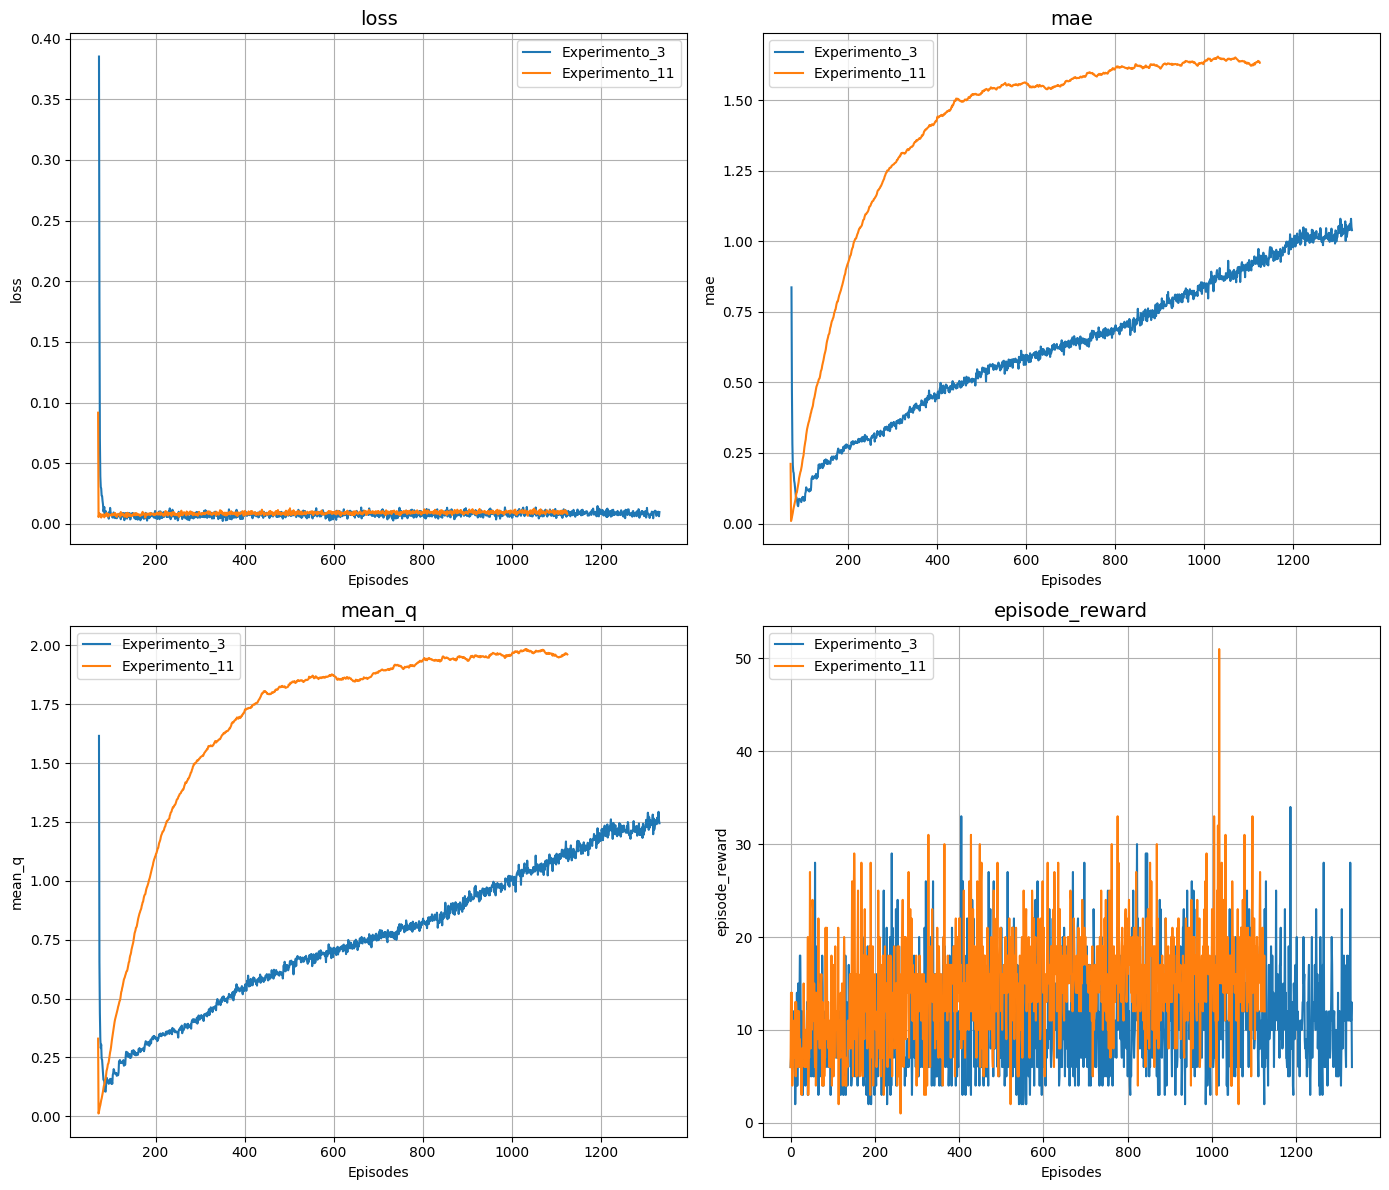

In [ ]:
experimentos_1M = {
    "Experimento_3": "./Experimento_3/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_11": "./Experimento_11/modelos/dqn_SpaceInvaders-v0_log.json"
    }

plot_experiments(experimentos_1M)

En estos resultados pordemos ver que hay una diferencia notoria entre ambos experimentos. En el caso del *Experimento_11*, hay un aprendizaje inicial más rápido, alcanzando rápidamente un valor alto en el promedio de Q-values (*mean_q*) y manteniendo una baja pérdida (*loss*) durante casi todo el entrenamiento. Sin embargo, su error medio absoluto (mae) tiende a estabilizarse en valores más altos en comparación con el Experimento_3. Por otro lado, el *Experimento_3* muestra un aprendizaje más progresivo y lento, con un aumento constante en los Q-values y un menor mae al final del entrenamiento, aunque su recompensa por episodio (*episode_reward*) presenta una mayor dispersión y menor consistencia que el *Experimento_11*. En general, *Experimento_11* parece haber aprendido más rápido y alcanzado mayor estabilidad en las recompensas, mientras que *Experimento_3* muestra un aprendizaje más conservador y gradual. Esto sugiere que *Experimento_11* puede haber explotado más rápidamente las políticas aprendidas, mientras que *Experimento_3* mantiene un aprendizaje más prudente, posiblemente con mayor margen para seguir mejorando.

Para 500.000 steps:

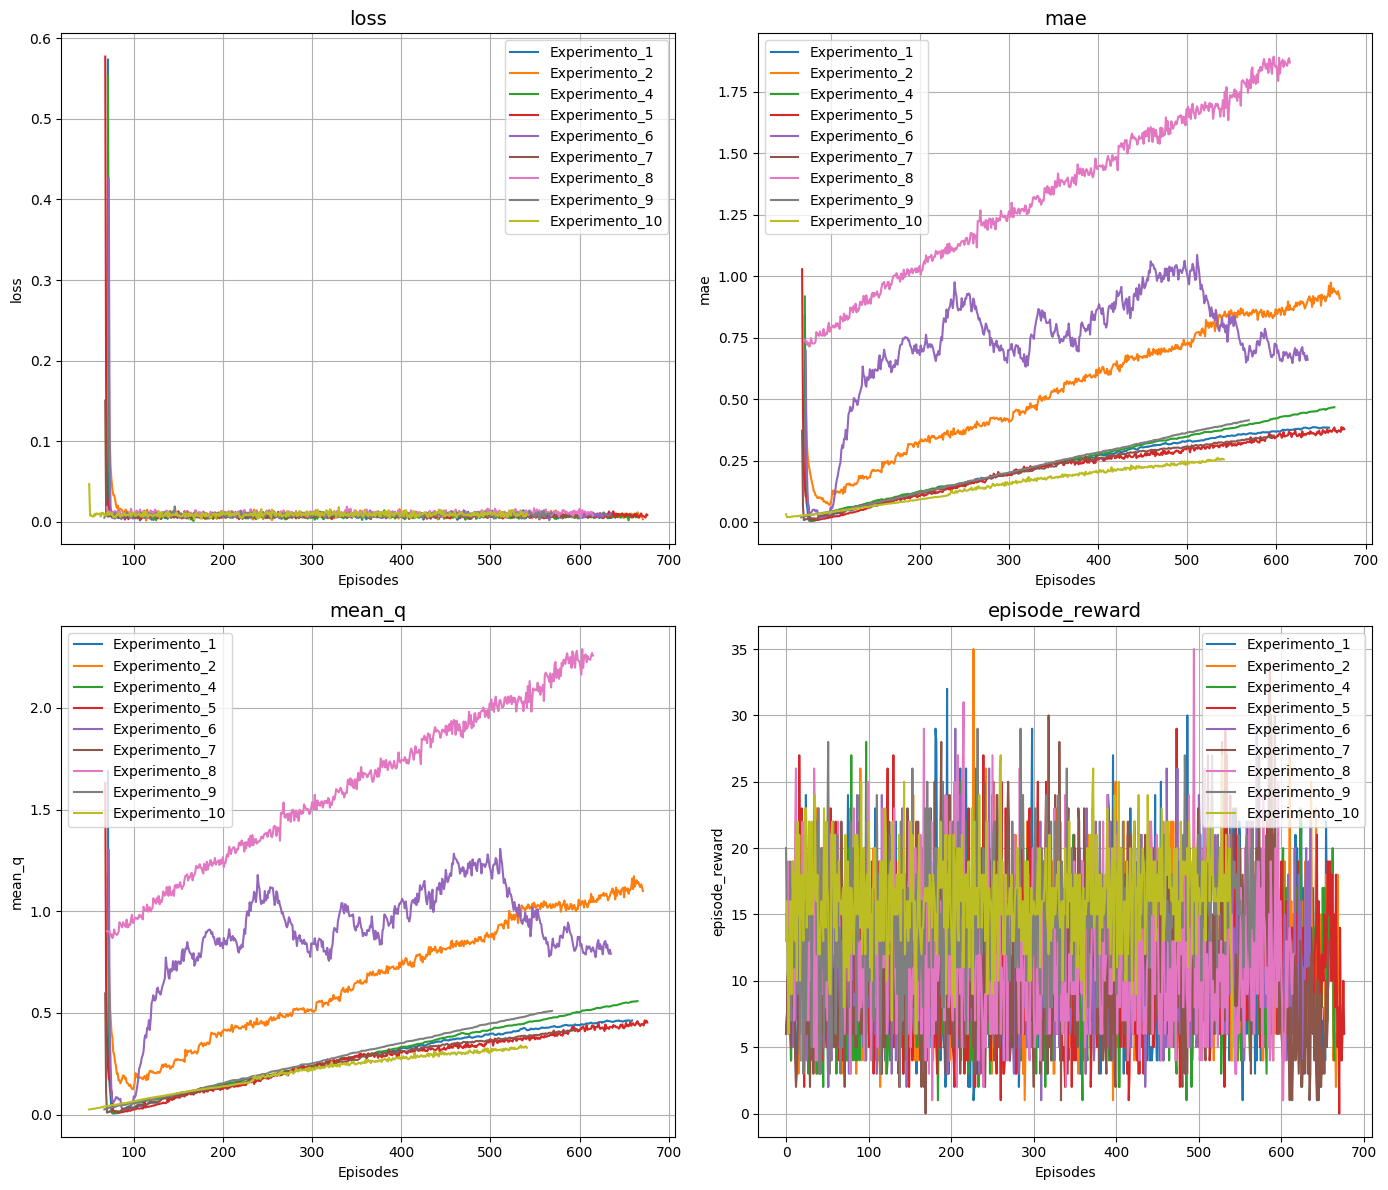

In [ ]:
experimentos_500k = {
    "Experimento_1": "./Experimento_1/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_2": "./Experimento_2/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_4": "./Experimento_4/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_5": "./Experimento_5/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_6": "./Experimento_6/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_7": "./Experimento_7/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_8": "./Experimento_8/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_9": "./Experimento_9/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_10": "./Experimento_10/modelos/dqn_SpaceInvaders-v0_log.json"
    }

plot_experiments(experimentos_500k)

Para tener una visión algo más clara, vamos a quitar los experimentos 6 y 7 ya que la recompensa media que tenemos en los test es cero o cercana a ello.

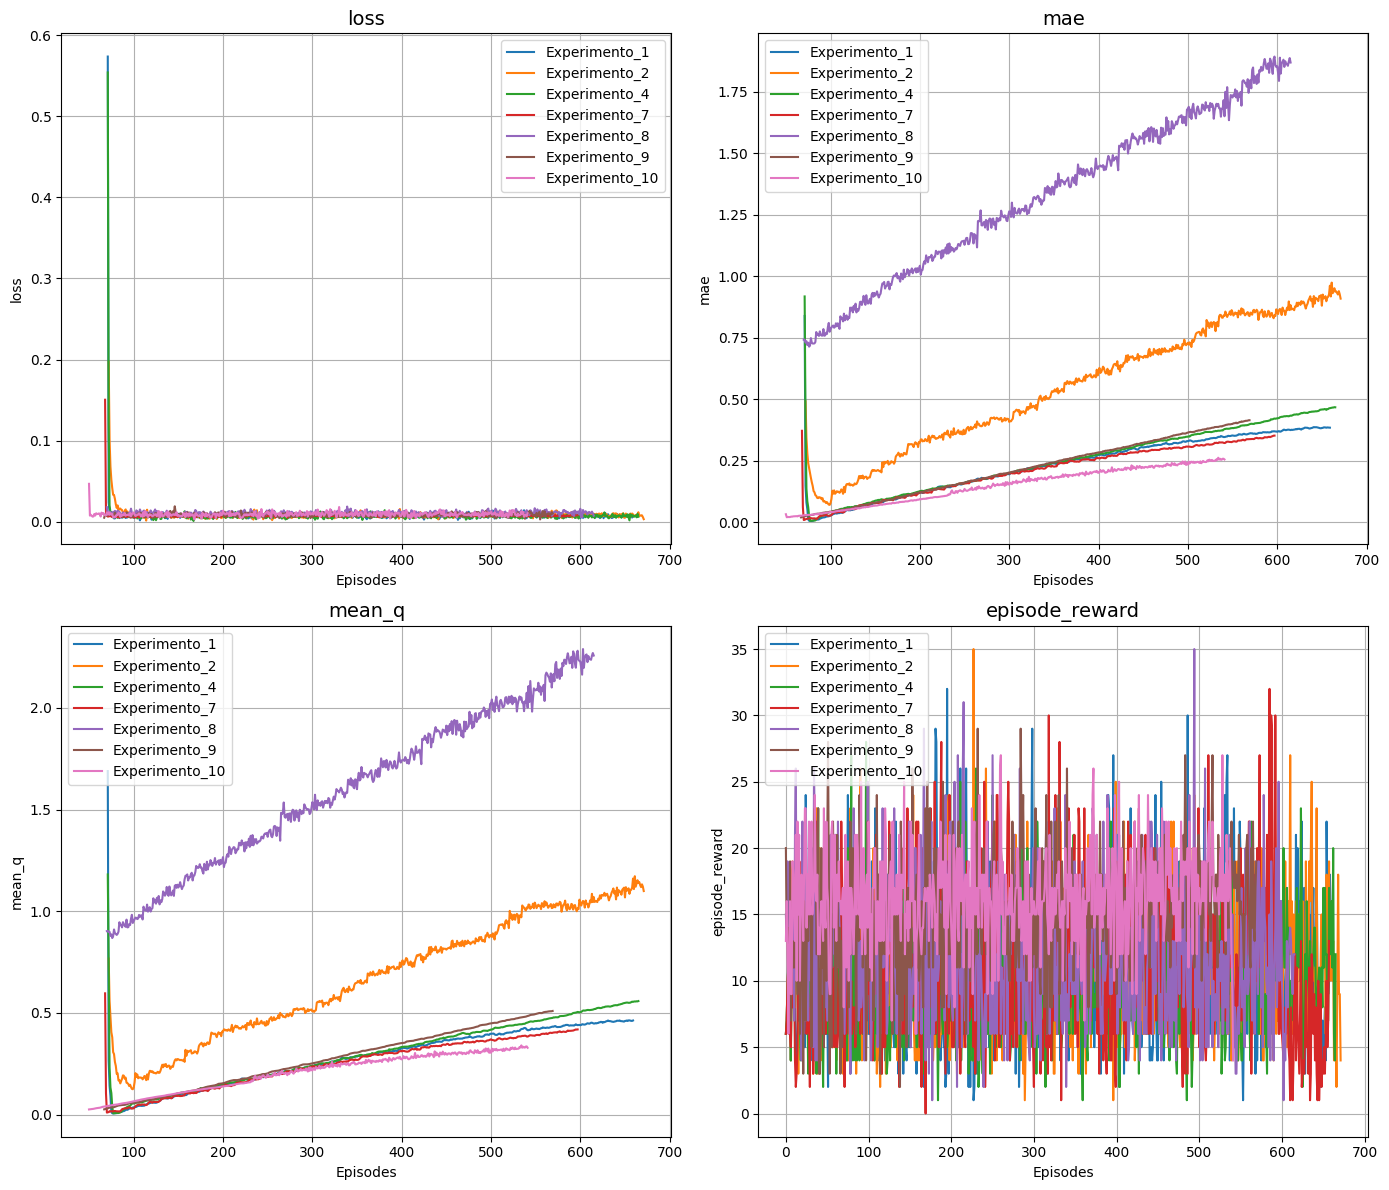

In [ ]:
experimentos_500k_clean = {
    "Experimento_1": "./Experimento_1/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_2": "./Experimento_2/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_4": "./Experimento_4/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_7": "./Experimento_7/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_8": "./Experimento_8/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_9": "./Experimento_9/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_10": "./Experimento_10/modelos/dqn_SpaceInvaders-v0_log.json"
    }

plot_experiments(experimentos_500k_clean)

En estos gráficos vemos el comportamiento de varios experimentos de entrenamiento. Podemos observar que todos los modelos logran estabilizar la función de pérdida (loss) rápidamente, manteniéndose cercana a cero después de los primeros episodios. Sin embargo, al analizar el error medio absoluto (mae) y el valor medio de Q (*mean_q*), hay notables diferencias, algunos experimentos muestran un crecimiento continuo en estas métricas, lo que sugiere un sobreajuste o una sobreestimación del valor Q. Por otro lado, otros experimentos mantienen un crecimiento más controlado.

Respecto a las recompensas por episodio (*episode_reward*), todos los experimentos presentan una alta variabilidad, sin una tendencia clara de mejora sostenida. Esto indica que, aunque los modelos aprendieron a minimizar la pérdida, la transferencia efectiva a una mejor política aún es limitada, o que el entorno sigue siendo muy complejo en esta fase inicial de entrenamiento. Destacamos que en el caso del (*Experimiento_10*) que aunque la media no esta sobre 20 de recompensa, es más estable que el resto de experimentos vistos entonrno a una media de 16.5.

Para 100.000 steps:

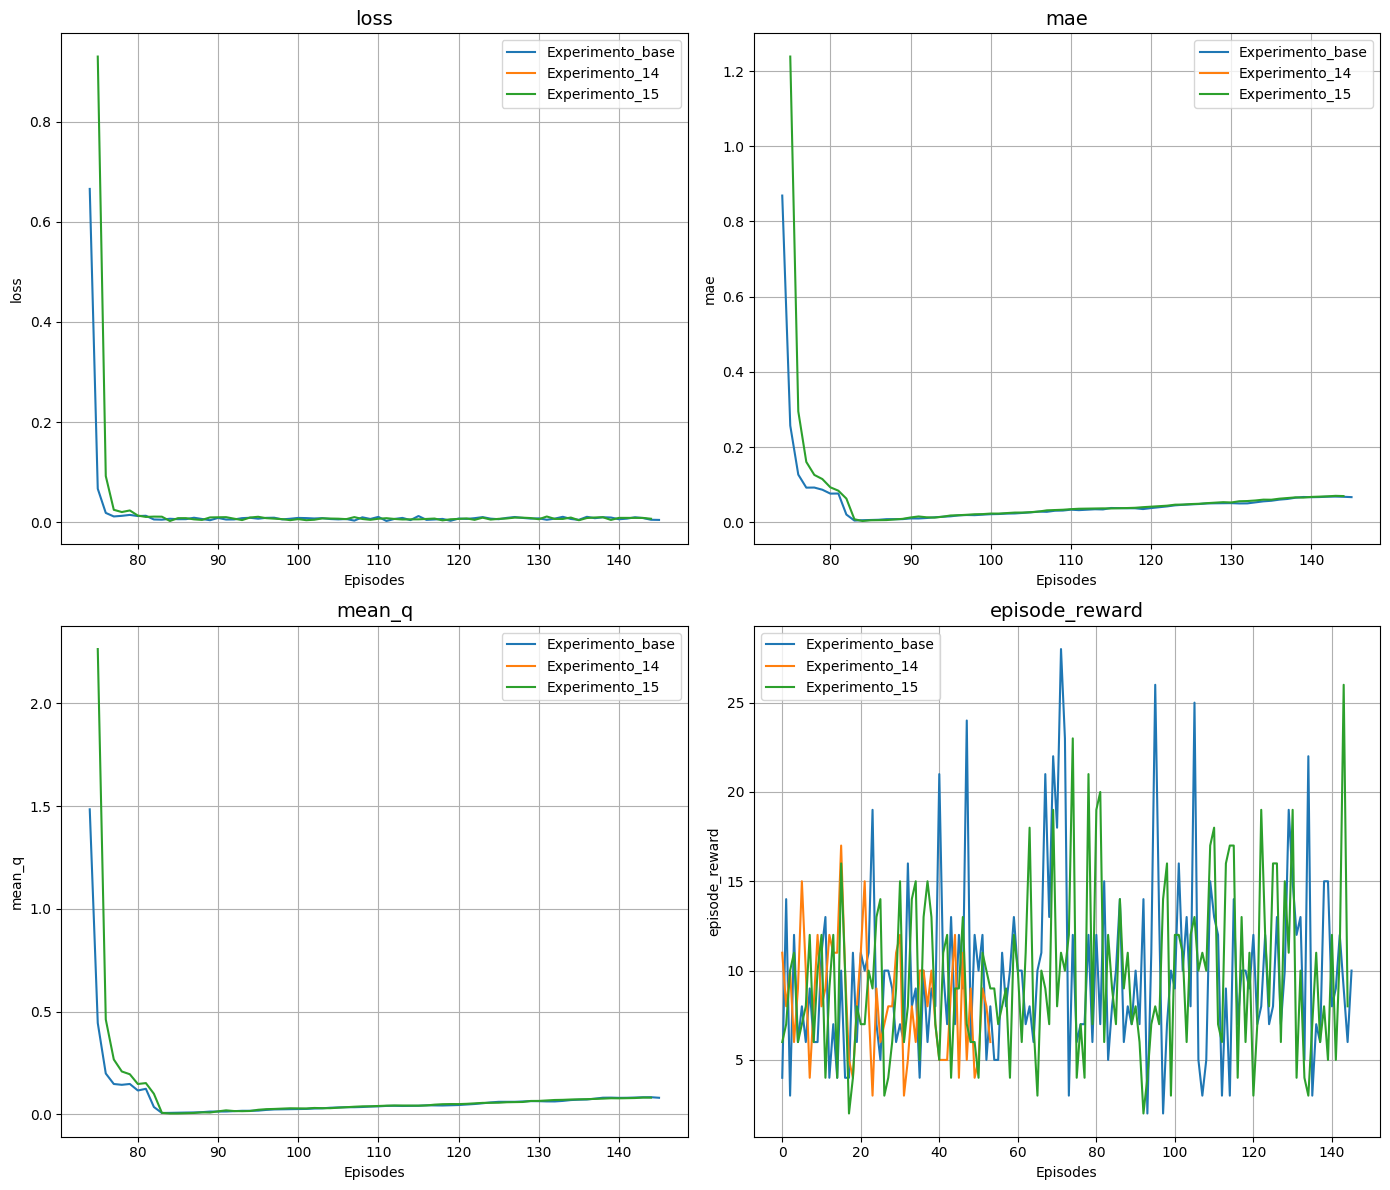

In [ ]:
experimentos_100k = {
    "Experimento_base": "./POC100/POC4/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_14": "./Experimento_14/modelos/dqn_SpaceInvaders-v0_log.json",
    "Experimento_15": "./Experimento_15/modelos/dqn_SpaceInvaders-v0_log.json"
    }

plot_experiments(experimentos_100k)

En el caso de estos experimentos, vemos que la función de pérdida cae drásticamente en los primeros episodios. Esto nos sugiere que la red neuronal está aprendiendo rápidamente a predecir los valores Q de manera más precisa, reduciendo el error entre las predicciones y los valores objetivo. El MAE, al igual que la pérdida, muestra un comportamiento similar: una disminución rápida en los primeros episodios y luego una estabilización en valores bajos. Esto refuerza la observación de que la red está realizando predicciones de valores Q consistentemente más precisas. Un MAE bajo indica que las predicciones del valor de las acciones son, en promedio, muy cercanas a los valores objetivo. Observamos que mean_q aumenta significativamente en los primeros episodios y luego tiende a estabilizarse en un valor positivo constante.

En cuando a la recompensa por episodio, podemos observar que en los diferentes experimentos, los valores iniciales de recompensa son más bajos y muy variables. A medida que el entrenamiento avanza (especialmente después de los primeros 20-30 episodios, donde se ve una mejora), se observa una tendencia general al aumento de la recompensa por episodio, aunque con mucha variabilidad.

## **Conclusiones**

El en desarrollo del trabajo hemos realizado numerosos experimentos probando distintas arquitecturas de redes neuronales para entrenar agentes DQN en el entorno propuesto. A pesar de no haber alcanzado resultados óptimos en cuanto a recompensas acumuladas o consistencia en el rendimiento, el proceso nos ha permitido explorar y analizar en profundidad el impacto de distintos diseños de red y configuraciones de entrenamiento.

Los gráficos muestran que, aunque algunas arquitecturas logran reducir la pérdida y aumentar los valores Q estimados (mean_q), esto no siempre se traduce en mejores recompensas en los episodios de prueba, evidenciando la complejidad y sensibilidad del problema de entrenamiento de agentes DQN. Además, hemos observado que ciertos modelos tienden a mostrar sobreajustarse o a presentar comportamientos inestables, lo cual es importante tener en cuenta para futuros ajustes.

También nos gustaría destacar que durante el desarrollo hemos tenido ciertos problemas con las ejecuciones debido a las limitaciones de hardware y memoria de nuestros sistemas operativos locales, lo que nos obligó a recurrir a la versión de pago de Google Colab para poder completar los entrenamientos de forma eficiente y sin interrupciones.

Como aporte adicional, se incluye en otro fichero (diferentes configs) en el github que hay una arquitectura extra con 8 experimentos diferentes. Pero los resultados obtenidos no han sido relevantes.

Toda la información detallada sobre los experimentos, incluyendo los pesos entrenados, configuraciones, logs y código, se encuentra disponible en el repositorio de GitHub adjunto al proyecto.

Enlace al repositorio colaborativo del proyecto en GitHub: [GitHub-proyecto-APR](https://github.com/juliomorbla/Proyecto_programacion_APR)